# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [2]:
#Importamos las librerias principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [3]:
#Cargamos dataset a utilizar
df_car = pd.read_csv('https://raw.githubusercontent.com/Patchwtf/MachineLearningProyects/refs/heads/main/Resources/car_evaluation.csv', header=None)

## Análisis exploratorio de datos

In [4]:
#Visualizacion del dataframe
df_car.head(5)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
#Analizamos el shape del objeto
df_car.shape

(1728, 7)

In [6]:
#Como podemos observar vamos a renombrar las columnas de manera correcta
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
df_car.columns = col_names

In [7]:
#Vericamos la transformacion
df_car.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
#Visualizamos los tipos de datos
df_car.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object
class,object


Primer resumen de los datos:
* Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
* Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.
* La clase es la variable de destino o target.

In [9]:
# Exploremos un poco mas la variable target
df_car['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


In [10]:
#Verificamos valores missings
df_car.isnull().sum()
df_car.isna().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


## Procesamiento de datos

In [11]:
from os import X_OK
#Separamos en X e y
X = df_car.drop(columns=['class'], axis=1)
y = df_car['class']

In [28]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [29]:
#Veamos que obtuvimos
X_train.shape , X_test.shape

((1209, 6), (519, 6))

In [30]:
y_train.shape , y_test.shape

((1209,), (519,))

In [31]:
#Veamos que tenemos. Por ejemplo, en X_train
X_train.head(5)

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [32]:
X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


## Entrenamiento de modelo de clasificación con árbol de decisión

In [18]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
!pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.2 MB/s eta 0:00:00


In [33]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols= ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [35]:
#Verificamos la transformacion
X_train.head(5)

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [36]:
#Importar árbol de decisión
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo

tree = DecisionTreeClassifier(max_depth=2, random_state=0)

In [37]:
#Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [39]:
#Calculo de las predicciones en Train y Test | En especifico, arbol de decision
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [40]:
y_test_pred_tree

array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'ac

## Evaluación de modelo de clasificación con árbol de decisión

In [44]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
#Calculo el accuracy en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print(f'El accuracy en train es: {train_accuracy_tree}\nEl accuracy en test es: {test_accuracy_tree}')

El accuracy en train es: 0.7733664185277088
El accuracy en test es: 0.7591522157996147


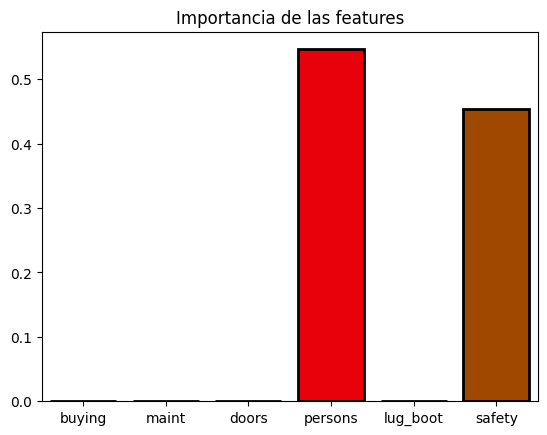

In [47]:
#Verificamos el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns

data = pd.DataFrame([importances], columns=columns)

sns.barplot(data, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de las features')
plt.show()

## Entrenamiento de modelo de clasificación con random forest

In [ ]:
#Importar random forest


In [ ]:
#Calculo de las predicciones en Train y Test


## Evaluación de modelo de clasificación con random forest

In [ ]:
#Calculo de metricas


#Calculo el accuracy en Train


#Calculo el accuracy en Test


#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.

In [42]:
# Visualizacion de las feature importantes


El f1 score en train es:  0.7733664185277088
El f1 score en test es:  0.7591522157996147


In [ ]:
#Grafico de barras


In [ ]:
# Matriz de confusion del RF


In [ ]:
#RF
